## Gather satellite data

In [2]:
pip install kagglehub

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\Pele\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [11]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("akhilchibber/deforestation-detection-dataset")

print("Path to dataset files:", path)

100%|██████████| 10.1G/10.1G [05:19<00:00, 34.0MB/s]  

Extracting files...


Path to dataset files: C:\Users\Pele\.cache\kagglehub\datasets\akhilchibber\deforestation-detection-dataset\versions\1


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tensorflow<2.11 (from versions: none)

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\Pele\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for tensorflow<2.11


In [15]:
import os
import matplotlib.pyplot as plt
import numpy as np
import math
from skimage.io import imread
from skimage.transform import resize
import rasterio
import tensorflow as tf
from tensorflow.keras.utils import normalize
from pathlib import Path
from sklearn.model_selection import train_test_split

ModuleNotFoundError: No module named 'tensorflow'

### Label loading

In [9]:
df = gpd.read_file('C:\\Users\\Pele\\.cache\\kagglehub\\datasets\\isaienkov\\deforestation-in-ukraine\\versions\\1\\deforestation_labels.geojson')
df

,img_date,tile,geometry
0,2016-04-09,36UXA,"POLYGON ((35.7913 50.17406, 35.79277 50.17354,..."
1,2016-04-09,36UXA,"POLYGON ((35.77653 50.10271, 35.7781 50.10318,..."
2,2016-04-09,36UXA,"POLYGON ((35.78621 50.01277, 35.78616 50.01369..."
3,2016-04-09,36UXA,"POLYGON ((35.78007 50.00556, 35.78189 50.00557..."
4,2016-04-09,36UXA,"POLYGON ((35.79781 49.99568, 35.79908 49.99582..."
...,...,...,...
5691,2019-09-09,36UYA,"POLYGON ((36.37494 50.17378, 36.37506 50.17376..."
5692,2019-09-09,36UYA,"POLYGON ((36.37849 50.17354, 36.37851 50.17352..."
5693,2019-09-09,36UYA,"POLYGON ((35.91477 50.22407, 35.91472 50.22394..."
5694,2019-10-26,36UYA,"POLYGON ((36.88312 50.26589, 36.88408 50.26489..."


Deforestation imagery

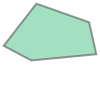

In [10]:
df['geometry'][0]